# Basic Starting Tasks

In [1]:
## Importing relavent libraries to help with cleaning and analysis.
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
## Importing relavent data sets.
activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
intensities <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
sleep <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [3]:
## Checking each table
head(activity)
head(calories)
head(intensities)
head(sleep)
head(weight)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


In [4]:
##str() summaries because I prefer referencing these over head()
str(activity)
str(calories)
str(intensities)
str(sleep)
str(weight)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ Calories    : int  81 61 59 47 48 48 48 47 68 141 ...


'data.frame':	22099 obs. of  4 variables:
 $ Id              : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ TotalIntensity  : int  20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num  0.333 0.133 0.117 0 0 ...


'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


'data.frame':	67 obs. of  8 variables:
 $ Id            : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr  "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num  52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num  116 116 294 125 126 ...
 $ Fat           : int  22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num  22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: chr  "True" "True" "False" "True" ...
 $ LogId         : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...


# Time to start cleanup

In [5]:
##Cleaning up all date-time columns to proper formatting
activity$ActivityDate <- mdy(activity$ActivityDate)
calories$ActivityHour <- mdy_hms(calories$ActivityHour)
intensities$ActivityHour <- mdy_hms( intensities$ActivityHour)
sleep$SleepDate <- as.Date(sleep$SleepDay, format = "%m/%d/%Y")
weight$Date <- mdy_hms(weight$Date)

In [6]:
head(activity)
head(calories)
head(intensities)
head(sleep)
head(weight)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,ActivityHour,Calories
,<dbl>,<dttm>,<int>
1,1503960366,2016-04-12 00:00:00,81
2,1503960366,2016-04-12 01:00:00,61
3,1503960366,2016-04-12 02:00:00,59
4,1503960366,2016-04-12 03:00:00,47
5,1503960366,2016-04-12 04:00:00,48
6,1503960366,2016-04-12 05:00:00,48


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<dttm>,<int>,<dbl>
1,1503960366,2016-04-12 00:00:00,20,0.333333
2,1503960366,2016-04-12 01:00:00,8,0.133333
3,1503960366,2016-04-12 02:00:00,7,0.116667
4,1503960366,2016-04-12 03:00:00,0,0.000000
5,1503960366,2016-04-12 04:00:00,0,0.000000
6,1503960366,2016-04-12 05:00:00,0,0.000000


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepDate
,<dbl>,<chr>,<int>,<int>,<int>,<date>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346,2016-04-12
2,1503960366,4/13/2016 12:00:00 AM,2,384,407,2016-04-13
3,1503960366,4/15/2016 12:00:00 AM,1,412,442,2016-04-15
4,1503960366,4/16/2016 12:00:00 AM,2,340,367,2016-04-16
5,1503960366,4/17/2016 12:00:00 AM,1,700,712,2016-04-17
6,1503960366,4/19/2016 12:00:00 AM,1,304,320,2016-04-19


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<dttm>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,2016-05-02 23:59:59,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,2016-05-03 23:59:59,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,2016-04-13 01:08:52,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,2016-04-21 23:59:59,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,2016-05-12 23:59:59,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,2016-04-17 23:59:59,72.4,159.6147,25,27.45,True,1.460938e+12


# Soft first look analysis

In [7]:
##Finding the sample size
n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(intensities$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

There were 33 total participants in this study, 24 of these took part in the sleep data as well. Only 8 of the participants also took part in the weight, this is not a large enough representation to be credible so will be discarded moving forward.

In [8]:
##Looking over data
activity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes, 
         Calories,
         VeryActiveMinutes,
         FairlyActiveMinutes,
         LightlyActiveMinutes) %>%
  summary()

calories %>%
  select(Calories) %>%
  summary()
sleep %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()
weight %>%
  select(WeightKg, BMI) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  
 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

# Notable Observations

Average Steps: 7638
Average Distance: 5.490 <- not sure what unit of measurment it is using, can infer it is probably miles or kilometers based on step count but will ignore data to avoid inferences.
Average Very Active: 21.16m
Average Fairly Active: 13.56m
Average lightly Active: 132.8m
Average Sedentary:991.2m
Average Sleep: 419.5m

Lets graph these numbers over time to see how they relate to the average day.

In [9]:
##Preparing for further analysis by adding a weekday column to each data set. Also simplifying minutes into hours.
activity <- activity %>%
  mutate(
    Weekday = weekdays(ActivityDate),
    LightlyActiveHours = LightlyActiveMinutes/60,
    FairlyActiveHours = FairlyActiveMinutes/60,
    VeryActiveHours = VeryActiveMinutes/60,
    SedentaryHours = SedentaryMinutes/60
    )

calories <- calories %>%
  mutate(
    Weekday = weekdays(ActivityHour)
    )

intensities <- intensities %>%
  mutate(
    Weekday = weekdays(ActivityHour)
    )

sleep <- sleep %>%
  mutate(
    Weekday = weekdays(SleepDate),
    HoursAsleep = TotalMinutesAsleep/60
    )

##Verify
head(activity)
head(calories)
head(intensities)
head(sleep)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday,LightlyActiveHours,FairlyActiveHours,VeryActiveHours,SedentaryHours
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday,5.466667,0.2166667,0.4166667,12.133333
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday,3.616667,0.3166667,0.3500000,12.933333
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thursday,3.016667,0.1833333,0.5000000,20.300000
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday,3.483333,0.5666667,0.4833333,12.100000
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday,3.683333,0.1666667,0.6000000,12.883333
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday,2.733333,0.3333333,0.6333333,8.983333


,Id,ActivityHour,Calories,Weekday
,<dbl>,<dttm>,<int>,<chr>
1,1503960366,2016-04-12 00:00:00,81,Tuesday
2,1503960366,2016-04-12 01:00:00,61,Tuesday
3,1503960366,2016-04-12 02:00:00,59,Tuesday
4,1503960366,2016-04-12 03:00:00,47,Tuesday
5,1503960366,2016-04-12 04:00:00,48,Tuesday
6,1503960366,2016-04-12 05:00:00,48,Tuesday


,Id,ActivityHour,TotalIntensity,AverageIntensity,Weekday
,<dbl>,<dttm>,<int>,<dbl>,<chr>
1,1503960366,2016-04-12 00:00:00,20,0.333333,Tuesday
2,1503960366,2016-04-12 01:00:00,8,0.133333,Tuesday
3,1503960366,2016-04-12 02:00:00,7,0.116667,Tuesday
4,1503960366,2016-04-12 03:00:00,0,0.000000,Tuesday
5,1503960366,2016-04-12 04:00:00,0,0.000000,Tuesday
6,1503960366,2016-04-12 05:00:00,0,0.000000,Tuesday


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepDate,Weekday,HoursAsleep
,<dbl>,<chr>,<int>,<int>,<int>,<date>,<chr>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346,2016-04-12,Tuesday,5.450000
2,1503960366,4/13/2016 12:00:00 AM,2,384,407,2016-04-13,Wednesday,6.400000
3,1503960366,4/15/2016 12:00:00 AM,1,412,442,2016-04-15,Friday,6.866667
4,1503960366,4/16/2016 12:00:00 AM,2,340,367,2016-04-16,Saturday,5.666667
5,1503960366,4/17/2016 12:00:00 AM,1,700,712,2016-04-17,Sunday,11.666667
6,1503960366,4/19/2016 12:00:00 AM,1,304,320,2016-04-19,Tuesday,5.066667


I created these groupings because I wanted to look at trends not only on a bases of "this much per day" but also relative to the day of the week.

In [10]:
##Group by day of week and return average. Most data is available in activity and only need to call  for sleep

activityWeek <- activity %>%
    group_by(Weekday) %>%
    summarise(
        totalSedentary = sum(SedentaryHours, na.rm = TRUE),
        totalLight = sum(LightlyActiveHours, na.rm = TRUE),
        totalFair = sum(FairlyActiveHours, na.rm = TRUE),
        totalVery = sum(VeryActiveHours, na.rm = TRUE),
        totalStep = sum(TotalSteps, na.rm = TRUE),
        totalDistance = sum(TotalDistance, na.rm = TRUE),
        totalCal = sum(Calories, na.rm = TRUE)
    )

sleepWeek <- sleep %>%
    group_by(Weekday) %>%
    summarise(
        totalSleep = sum(HoursAsleep, na.rm = TRUE)
    )

head(activityWeek)
head(sleepWeek)

Weekday,totalSedentary,totalLight,totalFair,totalVery,totalStep,totalDistance,totalCal
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
Friday,2100.650,428.8167,25.43333,42.11667,938477,669.05,293805
Monday,2055.883,384.1167,28.00000,46.21667,933704,666.35,278905
Saturday,1992.850,428.1000,31.41667,45.30000,1010969,725.98,292016
Sunday,1997.017,350.8500,29.30000,40.30000,838921,608.29,273823
Thursday,2356.883,454.2833,29.30000,47.55000,1088658,780.90,323337
Tuesday,2551.983,499.9333,36.31667,58.15000,1235001,886.50,358114


Weekday,totalSleep
<chr>,<dbl>
Friday,385.1500
Monday,328.0833
Saturday,406.7833
Sunday,415.0167
Thursday,435.9000
Tuesday,438.2500


This was more for my curiosity than it was for actual research purposes. Curious to see if there is any coorelation between most/least slept days and other variables.


# Aggregation Time

Lets compile our tables together with a join and look at the actual analysis!

In [11]:
##Making the merged analysis

##first to normalize the date column
names(sleep)[names(sleep) == "SleepDate"] <- "ActivityDate"

##Next lets get the intensity ready for analysis
intensities$ActivityHour <- as.POSIXct(intensities$ActivityHour, format = "%m/%d/%Y %I:%M:%S %p", tz = Sys.timezone())
intensities$ActivityTime <- format(intensities$ActivityHour, format = "%H:%M:%S")
intensities$ActivityDate <- as.Date(intensities$ActivityHour)
intense <- intensities %>%
    group_by(ActivityTime) %>%
    drop_na() %>%
    summarise(AverageIntensity = mean(TotalIntensity))
intenseDate <- intensities %>%
    group_by(ActivityDate) %>%
    drop_na() %>%
    summarise(AverageIntensity = mean(TotalIntensity),
             Id = first(Id))


fa <- merge(sleep, activity, by=c('Id', 'ActivityDate'))
is <- merge(sleep, intenseDate, by=c('Id', 'ActivityDate'))

head(fa)
head(intense)
head(intenseDate)
head(is)
head(sleep)

,Id,ActivityDate,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Weekday.x,HoursAsleep,TotalSteps,TotalDistance,⋯,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday.y,LightlyActiveHours,FairlyActiveHours,VeryActiveHours,SedentaryHours
,<dbl>,<date>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,4/12/2016 12:00:00 AM,1,327,346,Tuesday,5.450000,13162,8.50,⋯,25,13,328,728,1985,Tuesday,5.466667,0.2166667,0.4166667,12.133333
2,1503960366,2016-04-13,4/13/2016 12:00:00 AM,2,384,407,Wednesday,6.400000,10735,6.97,⋯,21,19,217,776,1797,Wednesday,3.616667,0.3166667,0.3500000,12.933333
3,1503960366,2016-04-15,4/15/2016 12:00:00 AM,1,412,442,Friday,6.866667,9762,6.28,⋯,29,34,209,726,1745,Friday,3.483333,0.5666667,0.4833333,12.100000
4,1503960366,2016-04-16,4/16/2016 12:00:00 AM,2,340,367,Saturday,5.666667,12669,8.16,⋯,36,10,221,773,1863,Saturday,3.683333,0.1666667,0.6000000,12.883333
5,1503960366,2016-04-17,4/17/2016 12:00:00 AM,1,700,712,Sunday,11.666667,9705,6.48,⋯,38,20,164,539,1728,Sunday,2.733333,0.3333333,0.6333333,8.983333
6,1503960366,2016-04-19,4/19/2016 12:00:00 AM,1,304,320,Tuesday,5.066667,15506,9.88,⋯,50,31,264,775,2035,Tuesday,4.400000,0.5166667,0.8333333,12.916667


ActivityTime,AverageIntensity
<chr>,<dbl>
00:00:00,2.1295503
01:00:00,1.4190782
02:00:00,1.0439443
03:00:00,0.4437299
04:00:00,0.6330472
05:00:00,4.9506438


ActivityDate,AverageIntensity,Id
<date>,<dbl>,<dbl>
2016-04-12,11.73359,1503960366
2016-04-13,10.99621,1503960366
2016-04-14,12.02525,1503960366
2016-04-15,12.25255,1503960366
2016-04-16,12.81641,1503960366
2016-04-17,10.23958,1503960366


,Id,ActivityDate,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Weekday,HoursAsleep,AverageIntensity
,<dbl>,<date>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
1,1503960366,2016-04-12,4/12/2016 12:00:00 AM,1,327,346,Tuesday,5.450000,11.73359
2,1503960366,2016-04-13,4/13/2016 12:00:00 AM,2,384,407,Wednesday,6.400000,10.99621
3,1503960366,2016-04-15,4/15/2016 12:00:00 AM,1,412,442,Friday,6.866667,12.25255
4,1503960366,2016-04-16,4/16/2016 12:00:00 AM,2,340,367,Saturday,5.666667,12.81641
5,1503960366,2016-04-17,4/17/2016 12:00:00 AM,1,700,712,Sunday,11.666667,10.23958
6,1503960366,2016-04-19,4/19/2016 12:00:00 AM,1,304,320,Tuesday,5.066667,12.52604


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,Weekday,HoursAsleep
,<dbl>,<chr>,<int>,<int>,<int>,<date>,<chr>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346,2016-04-12,Tuesday,5.450000
2,1503960366,4/13/2016 12:00:00 AM,2,384,407,2016-04-13,Wednesday,6.400000
3,1503960366,4/15/2016 12:00:00 AM,1,412,442,2016-04-15,Friday,6.866667
4,1503960366,4/16/2016 12:00:00 AM,2,340,367,2016-04-16,Saturday,5.666667
5,1503960366,4/17/2016 12:00:00 AM,1,700,712,2016-04-17,Sunday,11.666667
6,1503960366,4/19/2016 12:00:00 AM,1,304,320,2016-04-19,Tuesday,5.066667


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


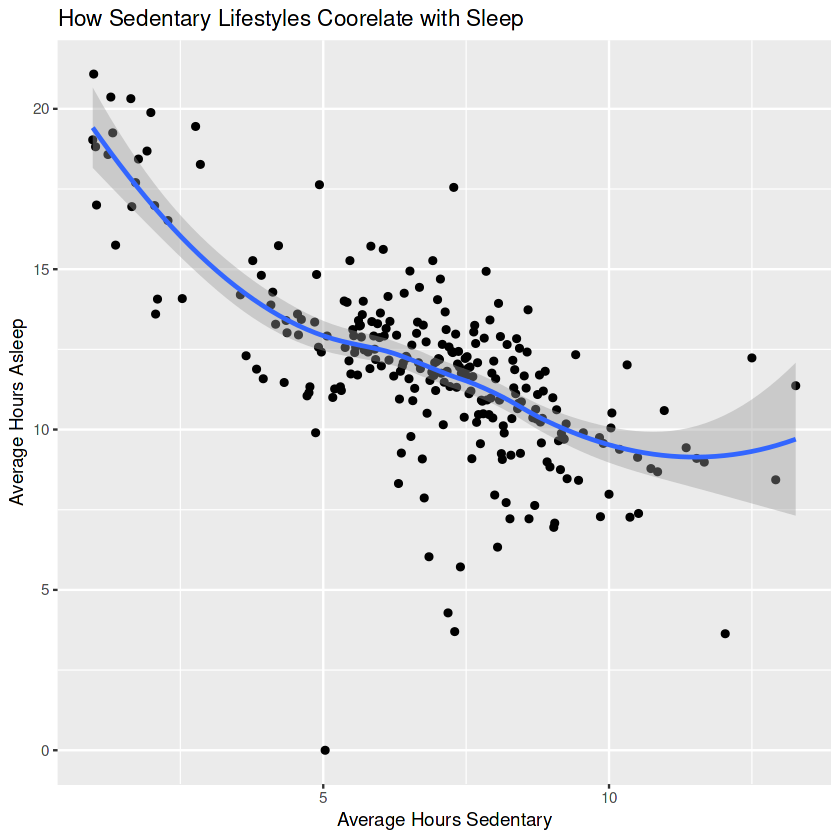

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


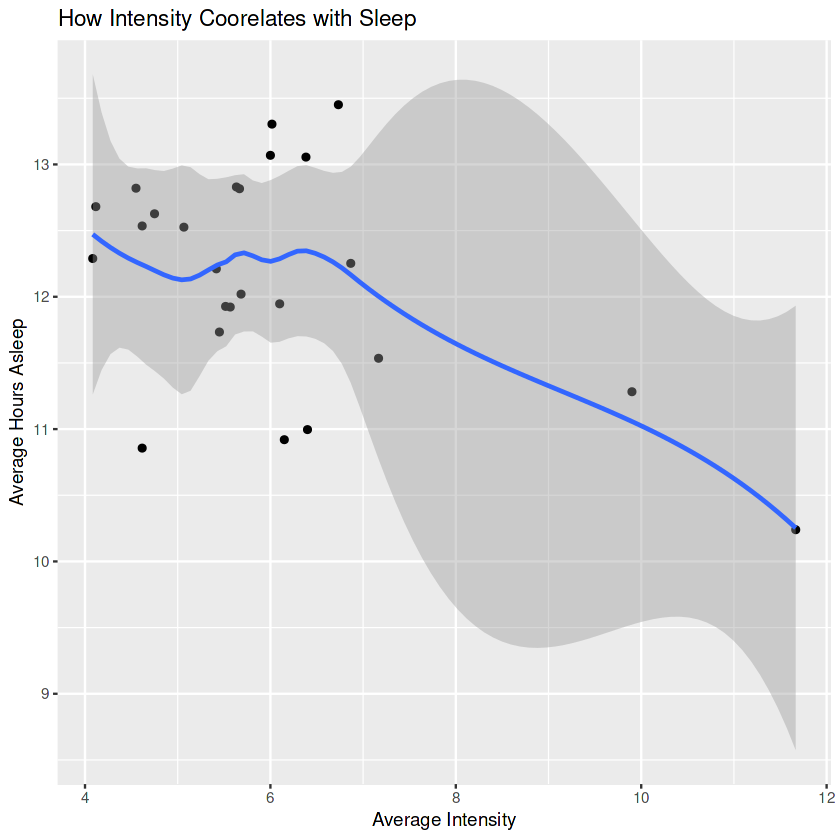

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


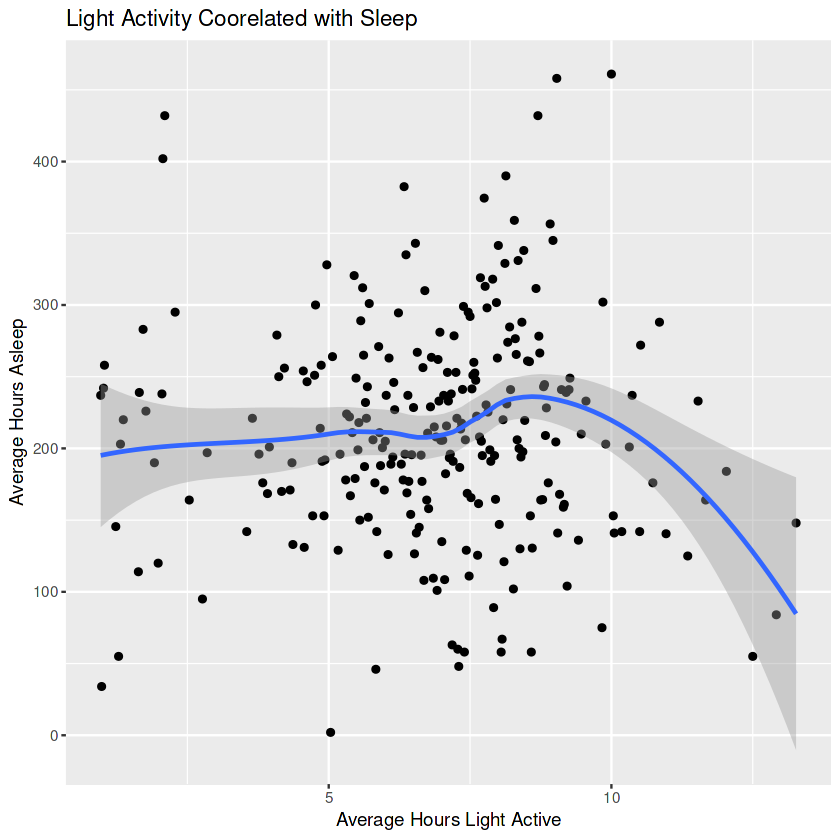

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


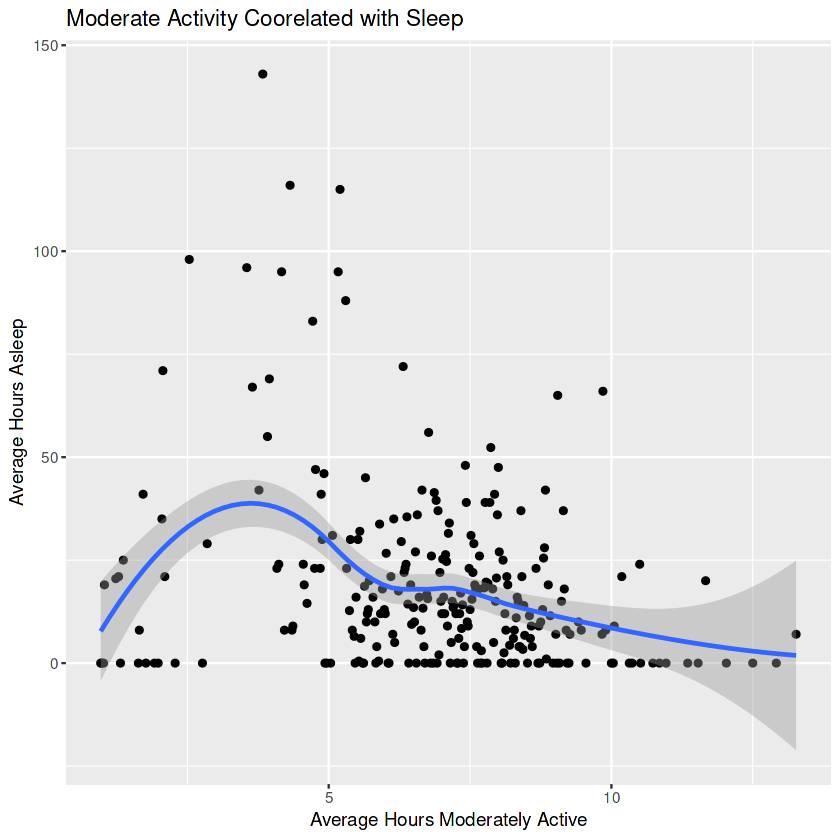

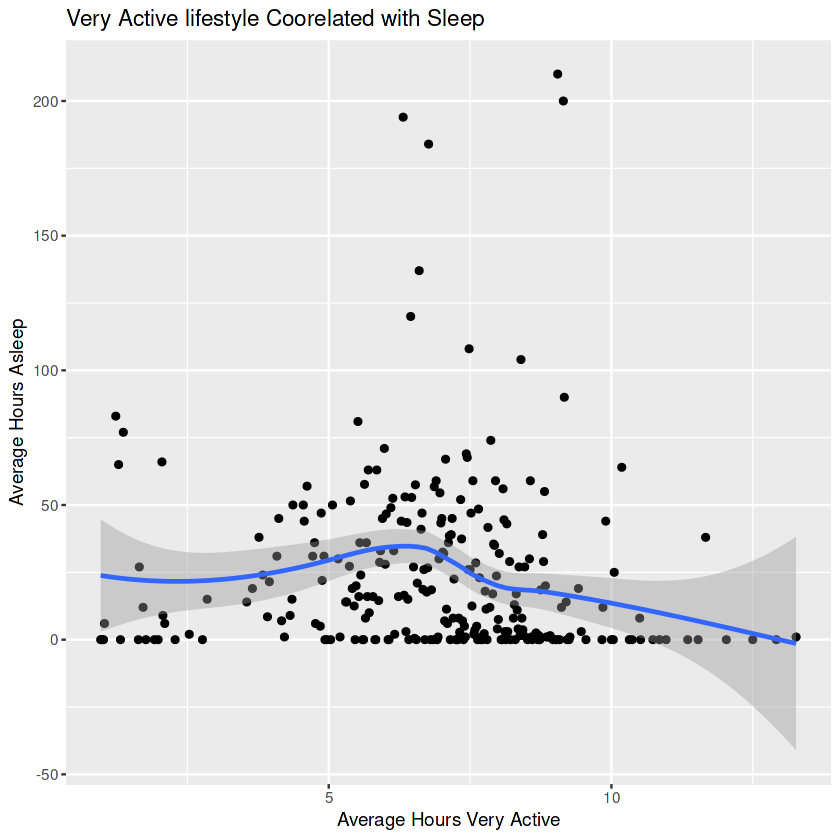

In [12]:
##lets visualize sleep curves, intensity curves, and steps
ggplot(data=fa, aes(x=HoursAsleep, y=SedentaryHours)) +
    geom_point(stat="summary", fun=mean) +
    geom_smooth() +
    labs(title="How Sedentary Lifestyles Coorelate with Sleep",
        x="Average Hours Sedentary",
        y="Average Hours Asleep")

ggplot(data=is, aes(x=HoursAsleep, y=AverageIntensity)) +
    geom_point() +
    geom_smooth() +
    labs(title="How Intensity Coorelates with Sleep",
        x="Average Intensity",
        y="Average Hours Asleep")

ggplot(data=fa, aes(x=HoursAsleep, y=LightlyActiveMinutes)) +
    geom_point(stat="summary", fun=mean) +
    geom_smooth() +
    labs(title="Light Activity Coorelated with Sleep",
        x="Average Hours Light Active",
        y="Average Hours Asleep")

ggplot(data=fa, aes(x=HoursAsleep, y=FairlyActiveMinutes)) +
    geom_point(stat="summary", fun=mean) +
    geom_smooth() +
    labs(title="Moderate Activity Coorelated with Sleep",
        x="Average Hours Moderately Active",
        y="Average Hours Asleep")

ggplot(data=fa, aes(x=HoursAsleep, y=VeryActiveMinutes)) +
    geom_point(stat="summary", fun=mean) +
    geom_smooth() +
    labs(title="Very Active lifestyle Coorelated with Sleep",
        x="Average Hours Very Active",
        y="Average Hours Asleep")

It appears that sedentary lifestyles affect sleep, there is no obvious patern with other active lifestyles and too many results where there was no sleep informatino where there was active information causing the plot to be filthy and skewed. I could have filtered out the bad sleep points but this would have limited the amount of data we were looking at and just based off of these visuals it is safew to say there is no need to dig deeper into the other coorelations.

With Intensity there is no obvious pattern based on limited data points.

Now lets look at just intenseity as a whole.

$x
[1] "Time of Day"

$y
[1] "Average Intensity Level"

$title
[1] "Intensity Over Time"

attr(,"class")
[1] "labels"

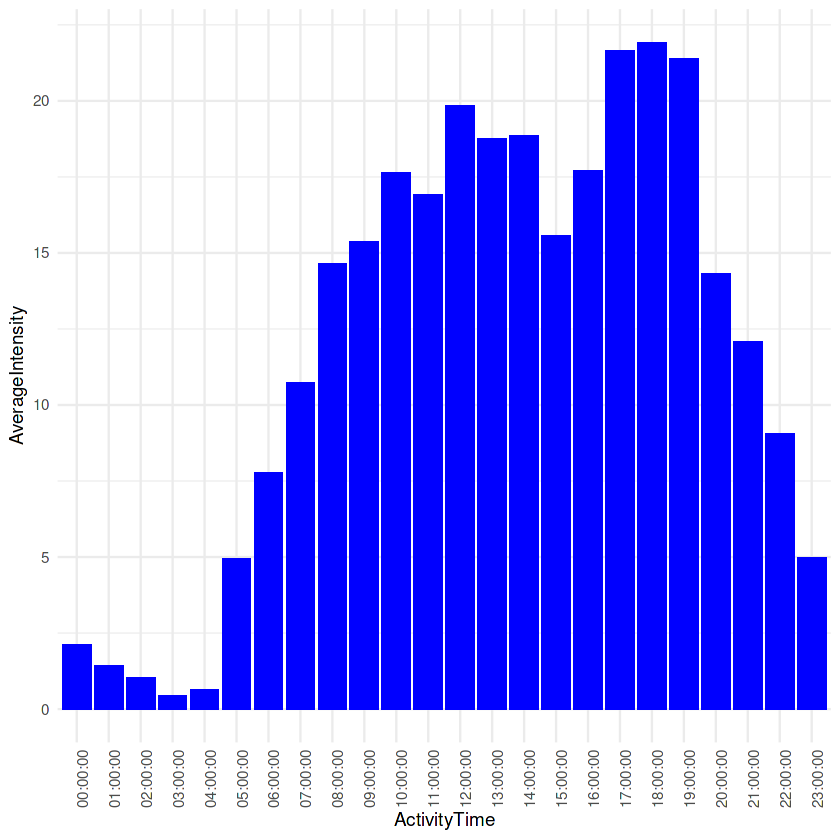

In [13]:
ggplot(data=intense, aes(x=ActivityTime, y=AverageIntensity)) +
    geom_bar(stat="summary", fun=mean, fill="blue") +
    theme_minimal() +
theme(axis.text.x = element_text(angle=90))
    labs(title="Intensity Over Time",
        x="Time of Day",
        y="Average Intensity Level")

function (x, y, ...) 
UseMethod("plot")
<bytecode: 0x5877a8481c90>
<environment: namespace:base>


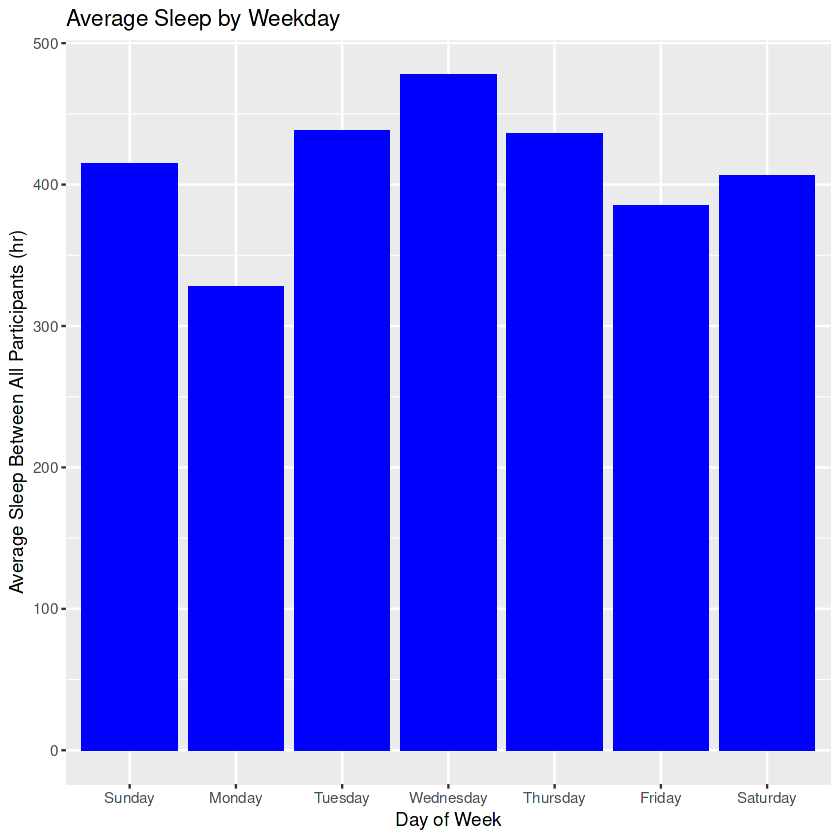

In [14]:
##Time to start visualizing

##Give the graph a logical chronological order
sleepWeek$Weekday <- factor(sleepWeek$Weekday, levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

##Create an easy to read chart of hours slept
ggplot(data = sleepWeek, aes(x = Weekday, y = totalSleep)) +
  geom_bar(stat = "summary", fun = mean, fill = "blue") +
  labs(title = "Average Sleep by Weekday",
       x = "Day of Week",
       y = "Average Sleep Between All Participants (hr)")

# Display the plot
print(plot)

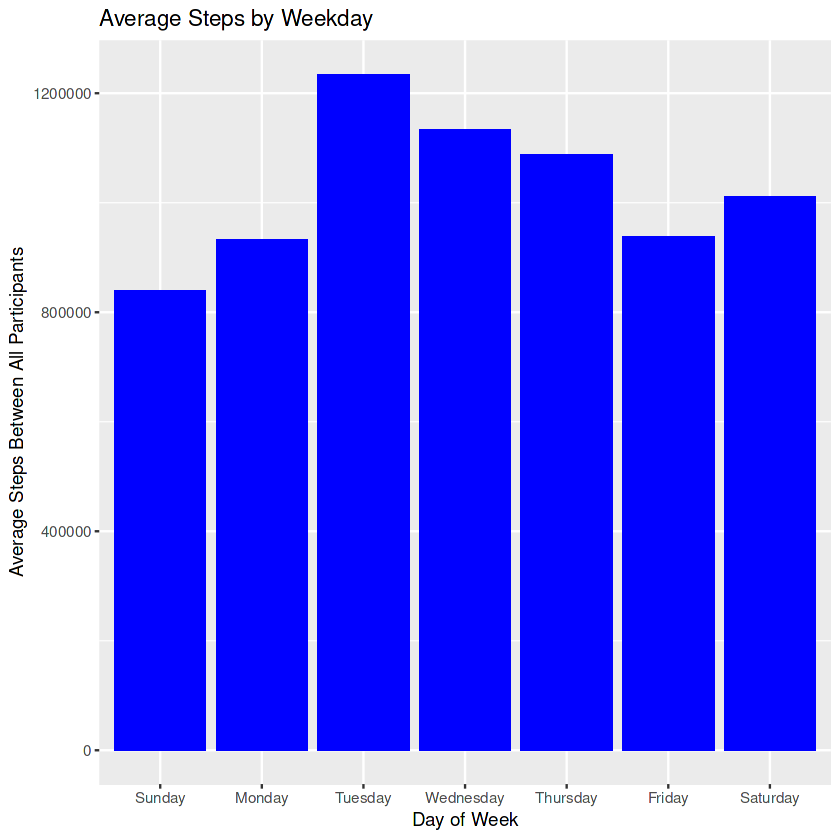

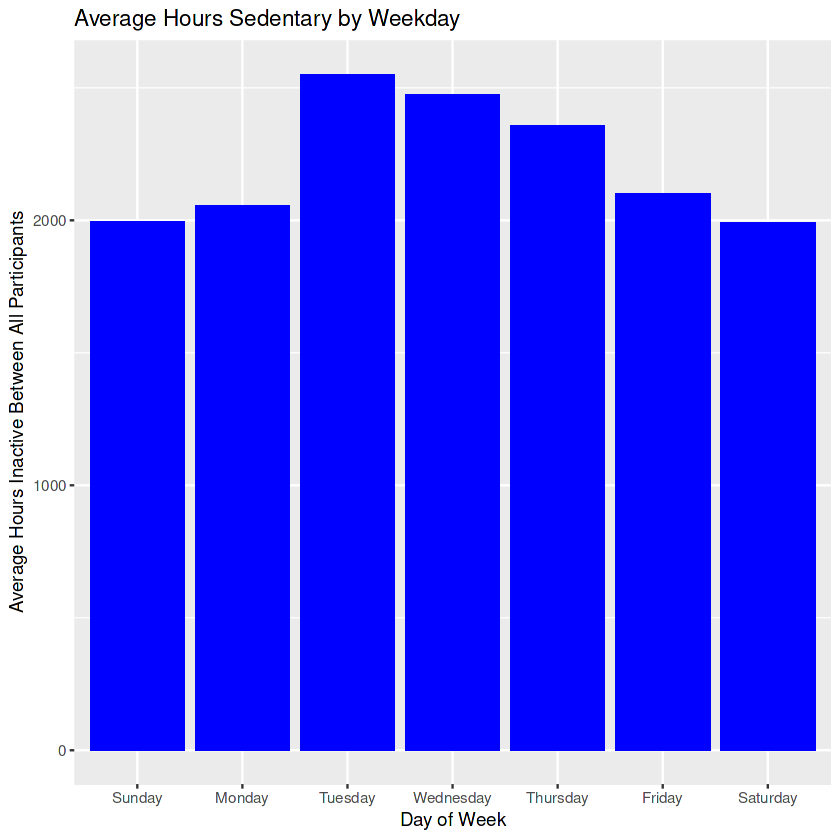

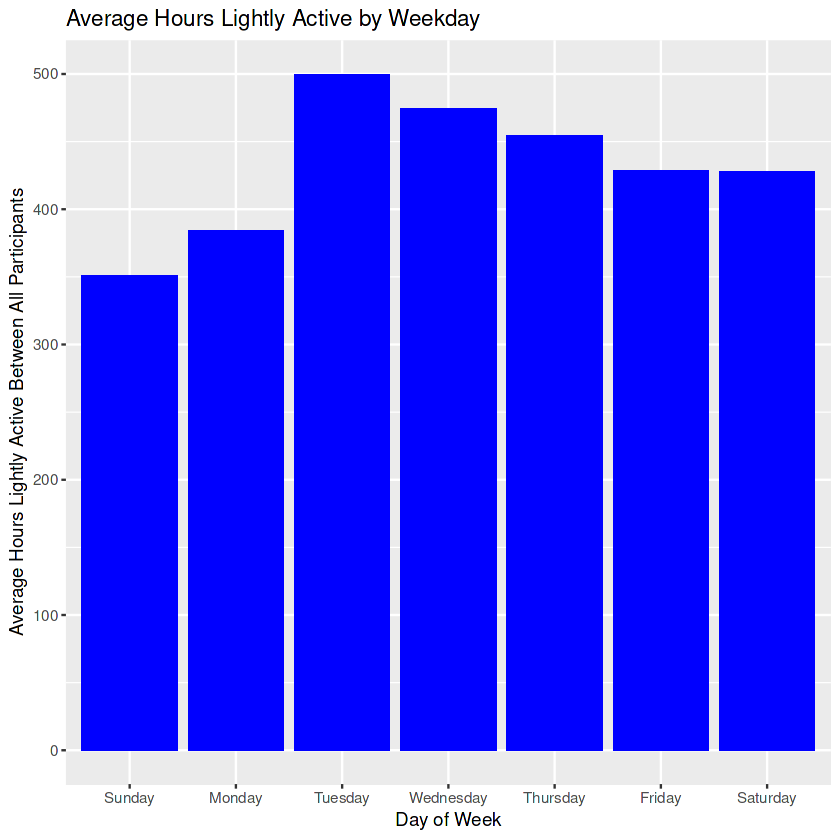

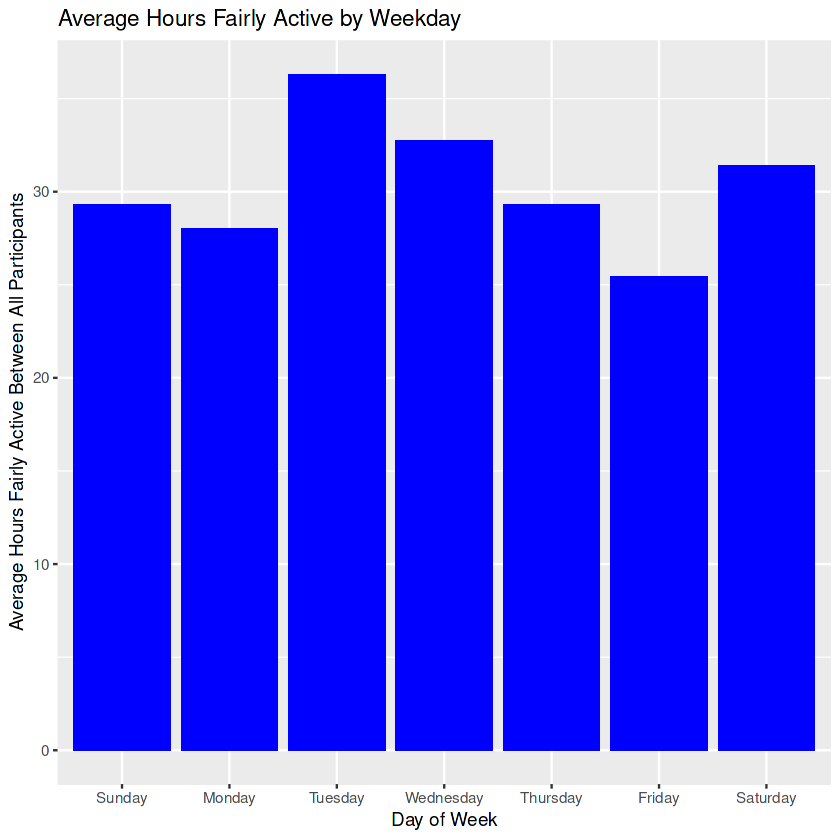

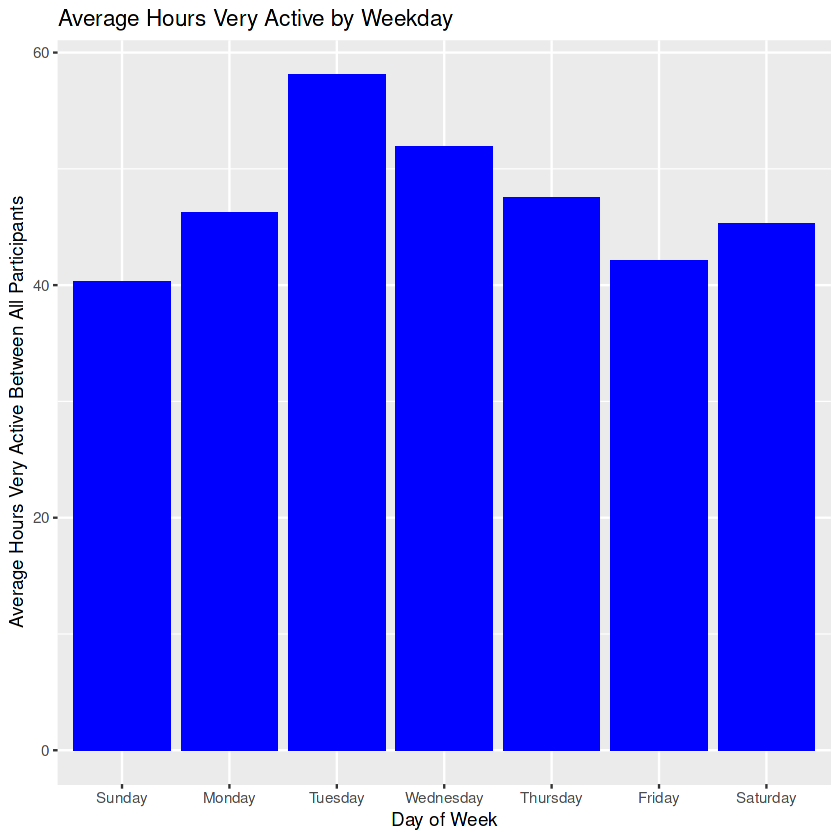

function (x, y, ...) 
UseMethod("plot")
<bytecode: 0x5877a8481c90>
<environment: namespace:base>


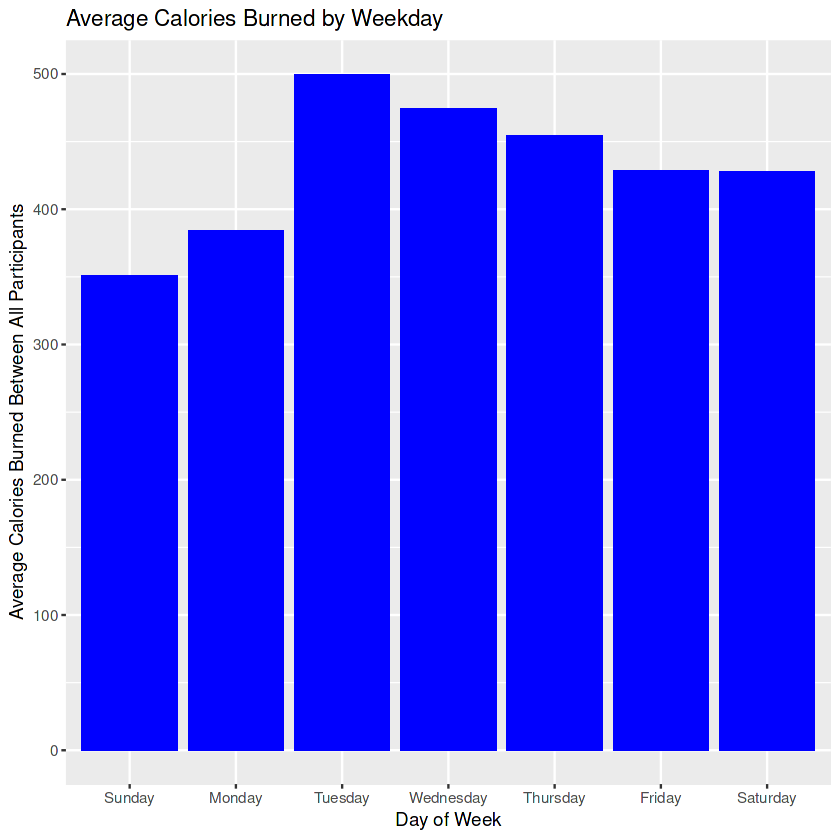

In [15]:
##Lets keep looking

##Give the graph a logical chronological order
activityWeek$Weekday <- factor(activityWeek$Weekday, levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

##Create an easy to read chart of Steps
ggplot(data = activityWeek, aes(x = Weekday, y = totalStep)) +
  geom_bar(stat = "summary", fun = mean, fill = "blue") +
  labs(title = "Average Steps by Weekday",
       x = "Day of Week",
       y = "Average Steps Between All Participants")

##Sedentary
ggplot(data = activityWeek, aes(x = Weekday, y = totalSedentary)) +
  geom_bar(stat = "summary", fun = mean, fill = "blue") +
  labs(title = "Average Hours Sedentary by Weekday",
       x = "Day of Week",
       y = "Average Hours Inactive Between All Participants")

##Lightly Active
ggplot(data = activityWeek, aes(x = Weekday, y = totalLight)) +
  geom_bar(stat = "summary", fun = mean, fill = "blue") +
  labs(title = "Average Hours Lightly Active by Weekday",
       x = "Day of Week",
       y = "Average Hours Lightly Active Between All Participants")

##Fairly Active
ggplot(data = activityWeek, aes(x = Weekday, y = totalFair)) +
  geom_bar(stat = "summary", fun = mean, fill = "blue") +
  labs(title = "Average Hours Fairly Active by Weekday",
       x = "Day of Week",
       y = "Average Hours Fairly Active Between All Participants")

##Very Active
ggplot(data = activityWeek, aes(x = Weekday, y = totalVery)) +
  geom_bar(stat = "summary", fun = mean, fill = "blue") +
  labs(title = "Average Hours Very Active by Weekday",
       x = "Day of Week",
       y = "Average Hours Very Active Between All Participants")

##Calories burned
ggplot(data = activityWeek, aes(x = Weekday, y = totalLight)) +
  geom_bar(stat = "summary", fun = mean, fill = "blue") +
  labs(title = "Average Calories Burned by Weekday",
       x = "Day of Week",
       y = "Average Calories Burned Between All Participants")

# Display the plot
print(plot)

As expected all charts follow the same trend (which wouldn't make sense otherwise). 

It does stand out that Tuesday is the most active day and Wednesday has the most avergae sleep and Sunday is the least active day with Monday having the most activity. Again, just for own curiosity while I am in the data set but could be interesting to look more further into this data in the future.

# Final Remarks

* Sedentary lifestyle has some affect on a persons sleep patern, it would be wise to use bellabeat products to inform and educate users which would result in overall happier and healthier customers.
* Bellabeat can focus on increasing sleep health as well as physical health for an overall better customer experience.
* Bellabeat can share this market research to educate the customers, thus creating an expert appeal with its consumers.